# Lab 4. Plotting with Seaborn I

### Data visualization is as much a part of the data processing step as the data presentation step. It is much easier to compare values when they are plotted than numeric values. By visualizing data we are able to get a better intuitive sense of the data than would be possible by looking at tables of values alone. Additionally, visualizations can bring to light hidden patterns in data, that you, the analyst, can exploit for model selection.

### Python has many libraries for creating visualizations, but the main one for data analysis (and other purposes) is matplotlib. The matplotlib library can be a little tricky to learn at first, but thankfully, pandas has its own wrappers around some of the matplotlib functionality, allowing us to create many different types of visualizations without needing to write a single line with matplotlib (or, at least, very few). For more complicated plot types that aren't built into pandas or matplotlib, we have the seaborn library, which we will discuss in the next chapter. 

## This session will cover:
1. Basic plotting with Seaborn

## 0. Let's load some libraries


In [1]:
import pandas as pd

In [2]:
### The matplotlib package is rather large since it encompasses quite a bit of functionality. Fortunately for us, for most of our plotting tasks, all we need is the pyplot module, which provides a MATLAB-like plotting framework
import matplotlib.pyplot as plt


In [3]:
import seaborn as sns

## 1. Let's load some data



### 1.1. COVID-19.
#### In the covid19_cases.csv file, we have an export from the daily number of new reported cases of COVID-19 by country worldwide dataset provided by the European Centre for Disease Prevention and Control (ECDC), which can be found at https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide. 
#### For scripted or automated collection of this data, the ECDC makes the current day's CSV file available via https://opendata.ecdc.europa.eu/covid19/casedistribution/csv. T
#### The snapshot we will be using was collected on September 19, 2020 and contains the number of new COVID-19 cases per country from December 31, 2019 through September 18, 2020, with partial data for September 19, 2020. For this chapter, we will look at the 8-month span from January 18, 2020 through September 18, 2020.



In [9]:
covid = pd.read_csv('../data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

In [10]:
covid.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
date,,,,,,,,,,,,
2020-01-18,18/01/2020,18,1,2020,0,0,Croatia,HR,HRV,4076246.0,Europe,0.0
2020-01-18,18/01/2020,18,1,2020,0,0,Greece,EL,GRC,10724599.0,Europe,0.0
2020-01-18,18/01/2020,18,1,2020,0,0,United_Kingdom,UK,GBR,66647112.0,Europe,0.0
2020-01-18,18/01/2020,18,1,2020,0,0,Azerbaijan,AZ,AZE,10047719.0,Europe,0.0
2020-01-18,18/01/2020,18,1,2020,0,0,Bahrain,BH,BHR,1641164.0,Asia,0.0


In [11]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42304 entries, 2020-01-18 to 2020-09-18
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     42304 non-null  object 
 1   day                                                         42304 non-null  int64  
 2   month                                                       42304 non-null  int64  
 3   year                                                        42304 non-null  int64  
 4   cases                                                       42304 non-null  int64  
 5   deaths                                                      42304 non-null  int64  
 6   countriesAndTerritories                                     42304 non-null  object 
 7   geoId                                                       42116 no

In [12]:
covid.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,42304.000000,42304.000000,42304.0,42304.000000,42304.000000,4.225800e+04,40399.000000
mean,15.785079,5.716623,2020.0,714.620461,22.380271,4.163560e+07,33.114790
std,8.793303,2.079677,0.0,4387.708253,128.195332,1.547424e+08,76.029934
min,1.000000,1.000000,2020.0,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,4.000000,2020.0,0.000000,0.000000,1.324820e+06,0.406767
50%,16.000000,6.000000,2020.0,11.000000,0.000000,7.813207e+06,4.667643
75%,23.000000,7.000000,2020.0,160.000000,3.000000,2.860872e+07,26.774018
max,31.000000,9.000000,2020.0,97894.000000,4928.000000,1.433784e+09,1058.225943


In [13]:
covid.groupby('countriesAndTerritories').count()

,dateRep,day,month,year,cases,deaths,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
countriesAndTerritories,,,,,,,,,,,
Afghanistan,235,235,235,235,235,235,235,235,235,235,235
Albania,194,194,194,194,194,194,194,194,194,194,181
Algeria,240,240,240,240,240,240,240,240,240,240,240
Andorra,189,189,189,189,189,189,189,189,189,189,176
Angola,181,181,181,181,181,181,181,181,181,181,168
...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,241,241,241,241,241,241,241,241,241,241,241
Western_Sahara,146,146,146,146,146,146,146,146,146,146,133
Yemen,162,162,162,162,162,162,162,162,162,162,149


## 2. Empirical distributions

## 2.1. Let's compute the empirical distribution of COVID-19 cases and deaths in Germany

In [14]:
covid.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
date,,,,,,,,,,,,
2020-01-18,18/01/2020,18,1,2020,0,0,Croatia,HR,HRV,4076246.0,Europe,0.0
2020-01-18,18/01/2020,18,1,2020,0,0,Greece,EL,GRC,10724599.0,Europe,0.0
2020-01-18,18/01/2020,18,1,2020,0,0,United_Kingdom,UK,GBR,66647112.0,Europe,0.0
2020-01-18,18/01/2020,18,1,2020,0,0,Azerbaijan,AZ,AZE,10047719.0,Europe,0.0
2020-01-18,18/01/2020,18,1,2020,0,0,Bahrain,BH,BHR,1641164.0,Asia,0.0


In [15]:
germanyFilter=covid['countriesAndTerritories']=='Germany'

In [16]:
covidInGermany=covid[germanyFilter]

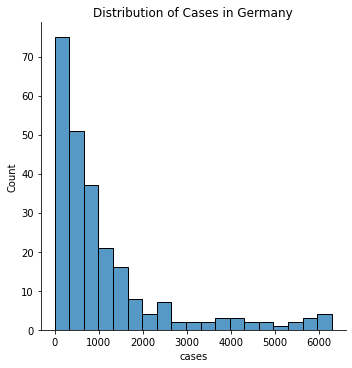

In [17]:
sns.displot(data=covidInGermany, x="cases").set(title='Distribution of Cases in Germany');

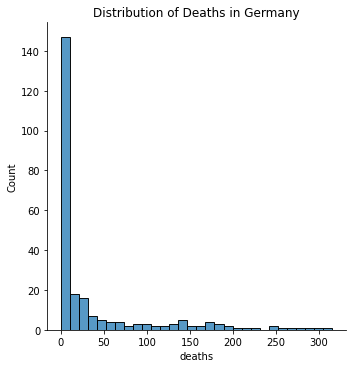

In [18]:
sns.displot(data=covidInGermany, x="deaths").set(title='Distribution of Deaths in Germany');

### 2.2. Let's compute the empirical distribution of COVID-19 cases and deaths in France

In [19]:
franceFilter=covid['countriesAndTerritories']=='France'

In [20]:
covidInFrance=covid[franceFilter]

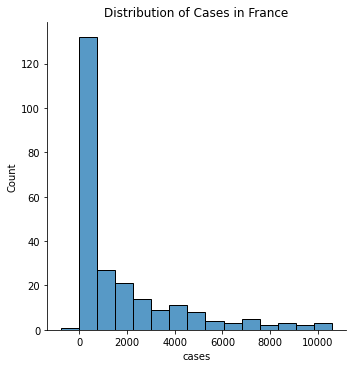

In [21]:
sns.displot(data=covidInFrance, x="cases").set(title='Distribution of Cases in France');

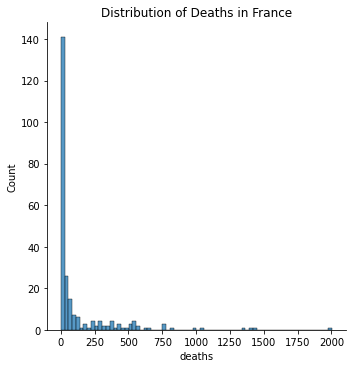

In [22]:
sns.displot(data=covidInFrance, x="deaths").set(title='Distribution of Deaths in France');

## 3. ScatterPlots

## 3.1. Relationship between cases and deaths in Germany

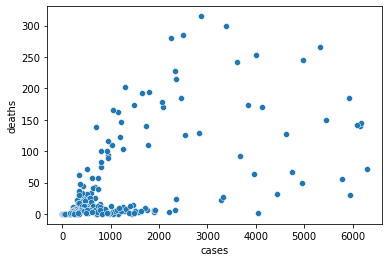

In [23]:
sns.scatterplot(data=covidInGermany, x="cases", y="deaths")

## 3.2. Relationship between cases and deaths in India

In [24]:
indiaFilter=covid['countriesAndTerritories']=='India'

In [25]:
covidInIndia=covid[indiaFilter]

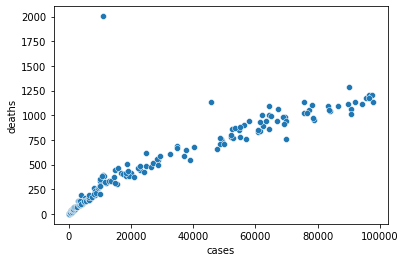

In [26]:
sns.scatterplot(data=covidInIndia, x="cases", y="deaths")

### 3.3 Let's compute the empirical distribution of COVID-19 cases and deaths accross continents

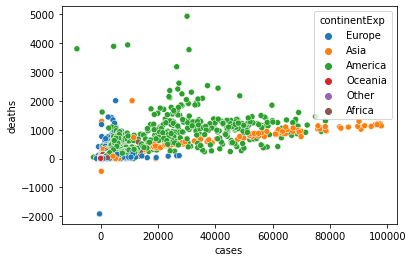

In [27]:
sns.scatterplot(data=covid, x="cases", y="deaths",hue='continentExp')

### Let's make the figure larger

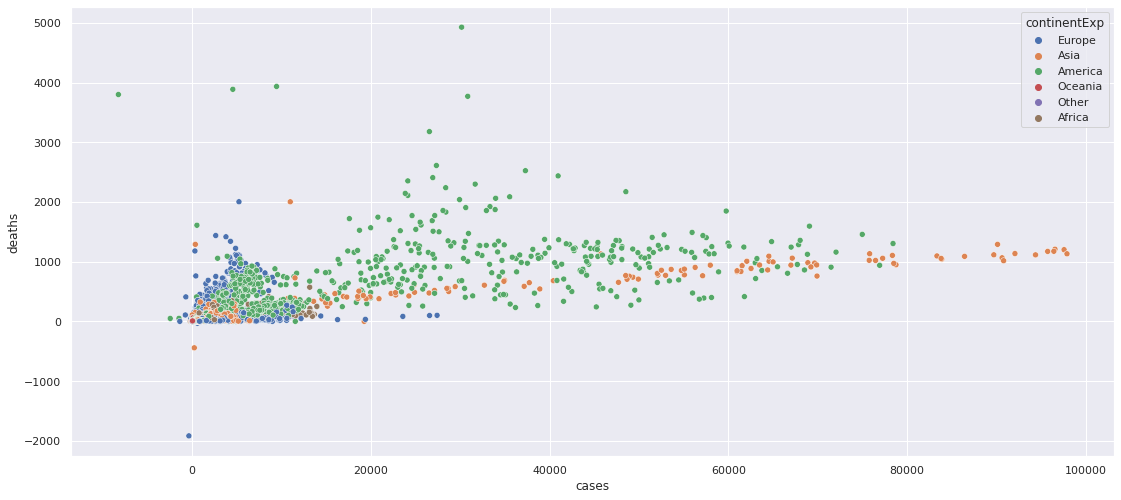

In [28]:
sns.set(rc={'figure.figsize':(18.7,8.27)})
sns.scatterplot(data=covid, x="cases", y="deaths",hue='continentExp')



### We can observe that Asia seems to have been able to contain death rates. 
### How about America ??

### 3.4 Let's have a look at large countries in the American continent

In [29]:
americaFilter=covid['continentExp']=='America'

In [30]:
largeCountryFilter=covid['popData2019']>=50000000

In [31]:
largeCountryAmericas=covid[(americaFilter&largeCountryFilter)]

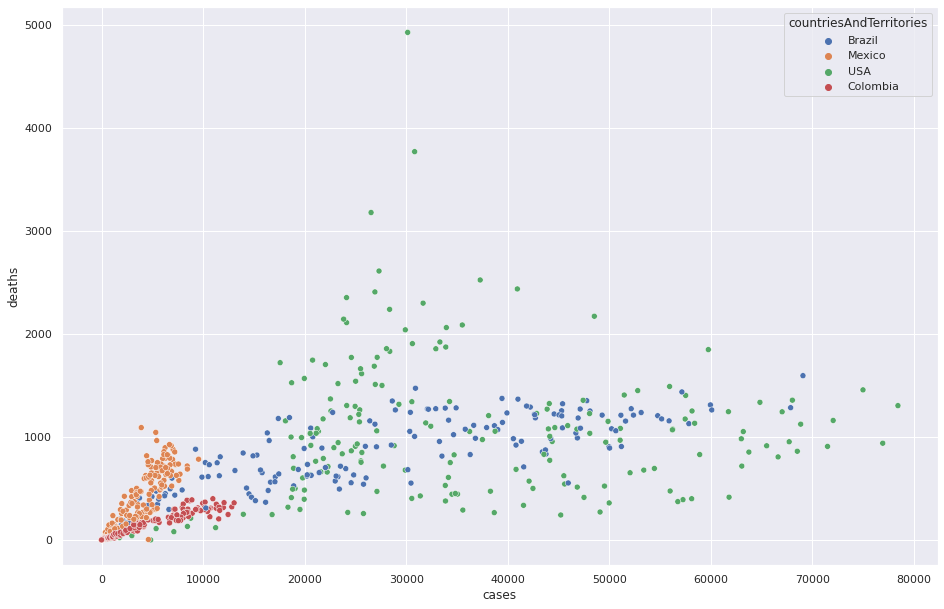

In [32]:
sns.set(rc={'figure.figsize':(15.7,10.27)})
sns.scatterplot(data=largeCountryAmericas, x="cases", y="deaths",hue='countriesAndTerritories')

### 4. Evolution accross time

### 4.1. Case evolution in Germany

In [33]:
covidInGermany

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
date,,,,,,,,,,,,
2020-01-18,18/01/2020,18,1,2020,0,0,Germany,DE,DEU,83019213.0,Europe,0.000000
2020-01-19,19/01/2020,19,1,2020,0,0,Germany,DE,DEU,83019213.0,Europe,0.000000
2020-01-20,20/01/2020,20,1,2020,0,0,Germany,DE,DEU,83019213.0,Europe,0.000000
2020-01-21,21/01/2020,21,1,2020,0,0,Germany,DE,DEU,83019213.0,Europe,0.000000
2020-01-22,22/01/2020,22,1,2020,0,0,Germany,DE,DEU,83019213.0,Europe,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-14,14/09/2020,14,9,2020,927,1,Germany,DE,DEU,83019213.0,Europe,21.650410
2020-09-15,15/09/2020,15,9,2020,1407,12,Germany,DE,DEU,83019213.0,Europe,21.878068
2020-09-16,16/09/2020,16,9,2020,1901,6,Germany,DE,DEU,83019213.0,Europe,22.654997


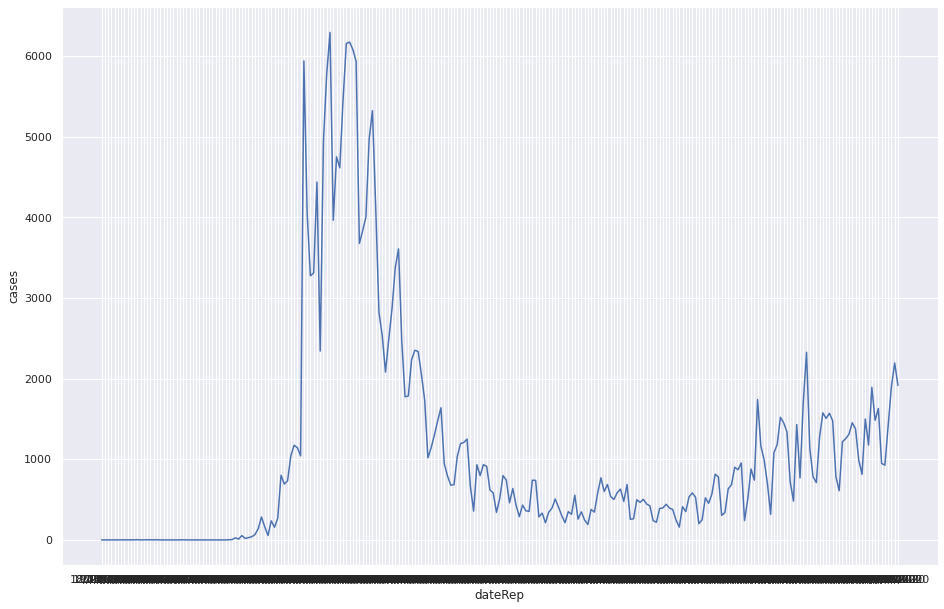

In [34]:
sns.lineplot(data=covidInGermany, x='dateRep', y="cases")

### 4.2. Case evolution in France

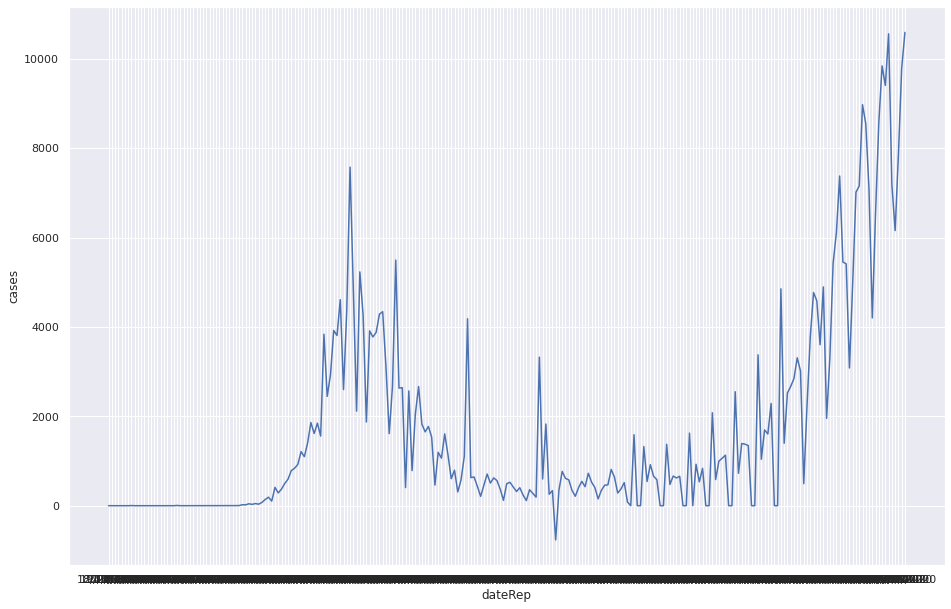

In [50]:
sns.lineplot(data=covidInFrance, x='dateRep', y="cases")

### Let's try to improve the plot

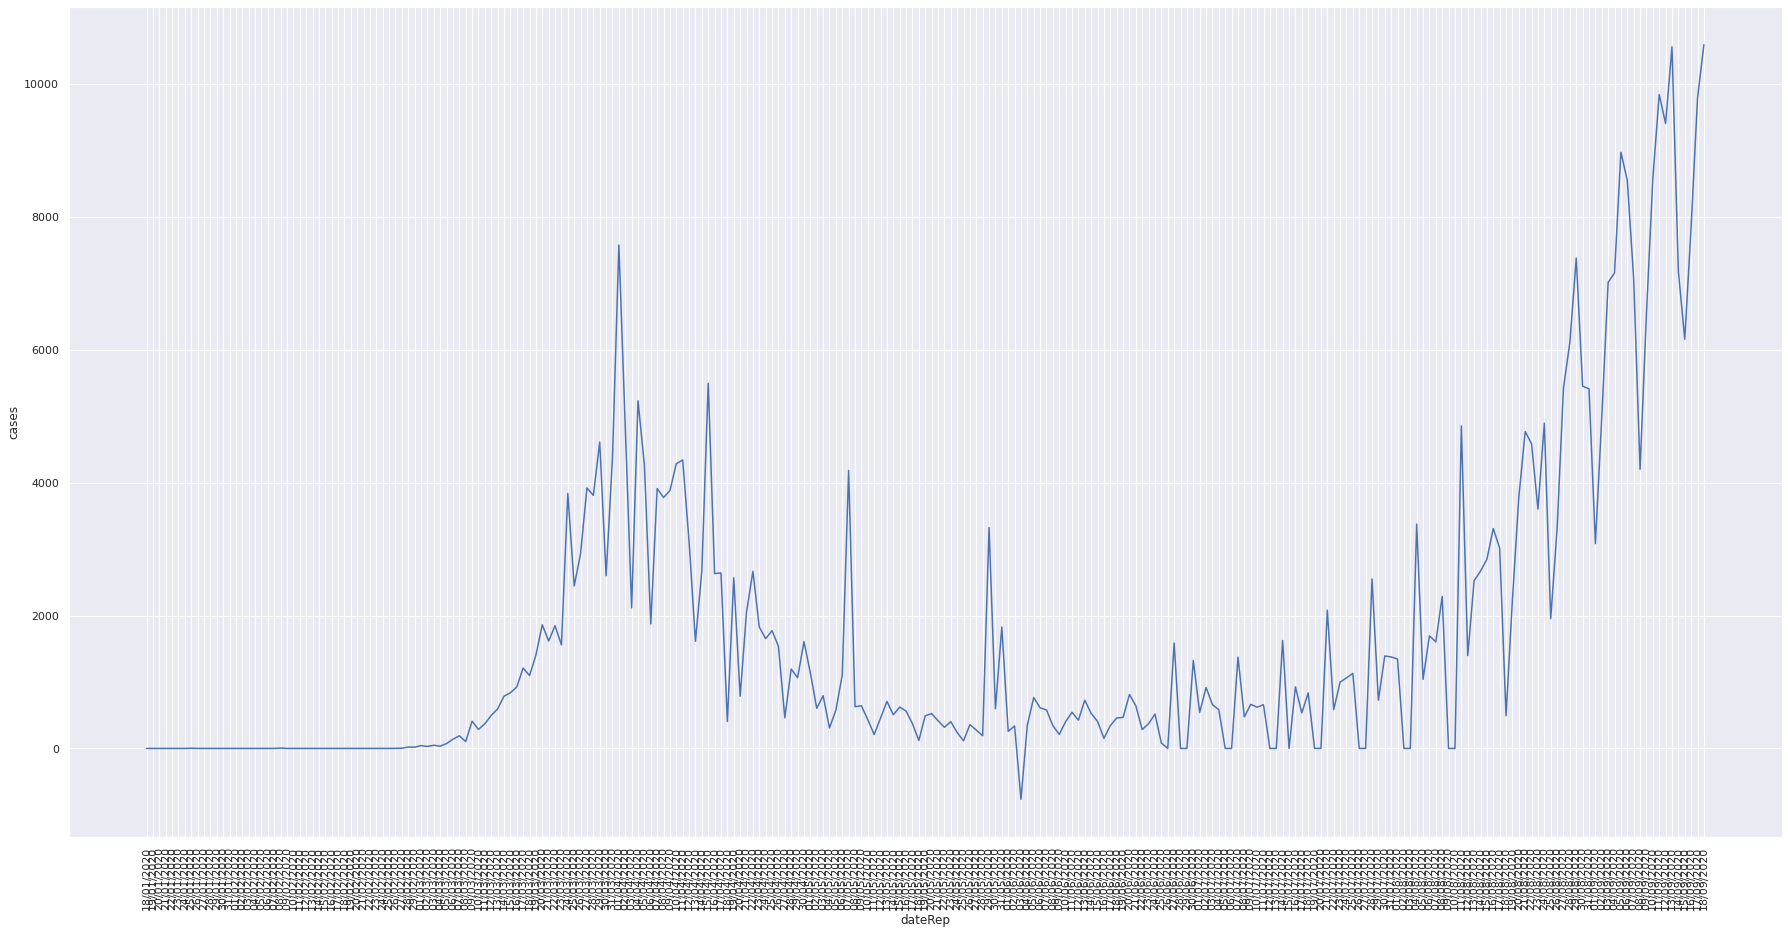

In [56]:
sns.set(rc={'figure.figsize':(30.7,15.27)})
sns.lineplot(data=covidInFrance, x='dateRep', y="cases");
plt.xticks(rotation=90);

### 5. BarPlots

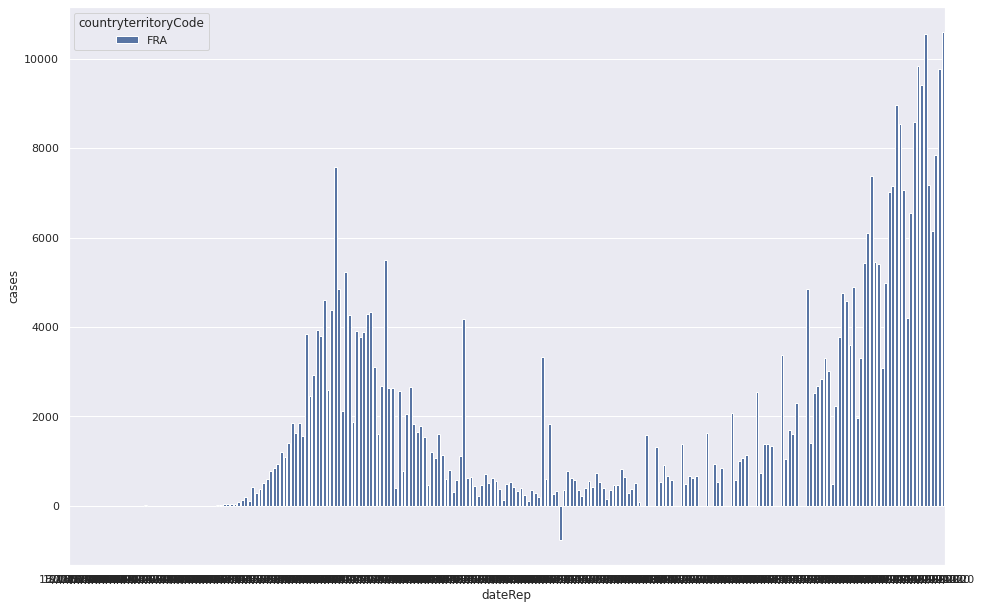

In [45]:
sns.barplot(x="dateRep", y="cases", data=pd.covidInFrance,hue='countryterritoryCode')

## There is no such thing as the best visualization, it really depends on the context and the insights it is trying to convey to the reader